In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ibge = pd.read_csv("/content/drive/MyDrive/datasetVacinas/ibge_completo.csv")

In [ ]:
ibge

,Município com acento,Regiao,População 2010,Urbana,Rural,Área totalKm2,Densidade demográficaHab./Km2,Postos_Vacinação
0,ADAMANTINA,RA de Presidente Prudente,33797,31948,1849,4114,8216,4
1,ADOLFO,RA de São José do Rio Preto,3557,3200,357,2111,1685,1
2,AGUAÍ,RA de Campinas,32148,29001,3147,4747,6772,5
3,ÁGUAS DA PRATA,RA de Campinas,7584,6771,813,1430,5305,1
4,ÁGUAS DE LINDÓIA,RA de Campinas,17266,17111,155,601,28716,4
...,...,...,...,...,...,...,...,...
640,VISTA ALEGRE DO ALTO,RA de Barretos,6886,6352,534,950,7250,1
641,VITÓRIA BRASIL,RA de São José do Rio Preto,1737,1435,302,497,3495,1
642,VOTORANTIM,RA de Sorocaba,108809,104659,4150,1837,59247,17
643,VOTUPORANGA,RA de São José do Rio Preto,84692,82319,2373,4241,19969,19


In [ ]:
sjc = np.where( (ibge['Município com acento'] == 'SÃO JOSÉ DOS CAMPOS').values==True)[0]
print(sjc)

[559]


In [ ]:
data = ibge.iloc[:, 2:8].values # 6 colunas
#data = ibge.iloc[:, 4:6].values # 2 colunas

In [ ]:
data

array([[ 33797,  31948,   1849,   4114,   8216,      4],
       [  3557,   3200,    357,   2111,   1685,      1],
       [ 32148,  29001,   3147,   4747,   6772,      5],
       ...,
       [108809, 104659,   4150,   1837,  59247,     17],
       [ 84692,  82319,   2373,   4241,  19969,     19],
       [  2335,   1836,    499,   3191,    732,      1]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)
print(scaled_data)

[[2.93191908e-03 2.80862579e-03 1.82781562e-02 2.05882353e-01
  6.26669447e-03 4.25531915e-03]
 [2.44563570e-04 2.30726802e-04 3.52909776e-03 1.04310345e-01
  1.04831100e-03 0.00000000e+00]
 [2.78537645e-03 2.54436155e-03 3.11094416e-02 2.37981744e-01
  5.11291316e-03 5.67375887e-03]
 ...
 [9.59805373e-03 9.32878767e-03 4.10245257e-02 9.04158215e-02
  4.70413579e-02 2.26950355e-02]
 [7.45483439e-03 7.32550871e-03 2.34581204e-02 2.12322515e-01
  1.56575475e-02 2.55319149e-02]
 [1.35967392e-04 1.08413799e-04 4.93282852e-03 1.59077079e-01
  2.86847293e-04 0.00000000e+00]]


In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(scaled_data)

In [ ]:
relevancia = kmeans.labels_
print(relevancia) # utilize esta informação para a tarefa de recuperação

[ 7  9  7  1  1  7 13  5  1  1 16  5 16  1 16 16  1  1 18  1  9 10 16  5
  5  8 16  1  9  5  1 14  9  9 16  1  5  8  9  0 16  1  1  9 13  1  7 10
  7  0 16 14  1  1  1  0  1  9  7  1  7  5  2  1  6  9  5  8  8 16  9  7
  1  0 16  8 16  8  9  1  1  1  1  0 16  2  0  9  1 16 14 14 16  9  9  9
 10 16  7  5  9 13  0 13  7  9  8  9 17 13 16  7 14  1  0  1  1  2  9 16
  7  3  0  5  9  5 16  1  9  0  1  9  9  9  1  7  8  9  7  1  9 16 16  1
  7 16 16  7  1 16 13  2  8  3  1  9  1  0  1  9  7  9  1  0  2  9  1  1
  6  1  9  1  7  9  1 16  9  0  7  1  0  1 11  9  9  0  9  0  6 13  1 16
  0  9  9  7  8 16 16  9 14 16 10 16  0  0  1  7  5 16  8  0 16 18 15  7
  9 16  1  6  0 16  7 16 16  9  8 12 16  0  1  7 16 19  9  8 16 16  1 16
  1  9  9  9  1 14  7  1  9  9 14 14  0  9  0  9 13 19 19  6  0  7  5  0
  1 16  6  5 16 10  5  0  1  1  8  9  8 16  8  7  1  8  1 16  9 11  0  9
  8  1 16  7  5  1  1 10  0  8  0  9  7  0  1  7  8  0  1  0  7  1 13 16
  9  0  1  1  7  9  9 16 16  9 10  9  5  0  1  9 14

In [ ]:
hist,bin_edges = np.histogram(relevancia, range=(0, relevancia.max()), bins=relevancia.max() + 1)
print(hist)

[ 58 137   8   5   1  27   8  53  50 127  12   4   1  20  18   1 102   3
   7   3]


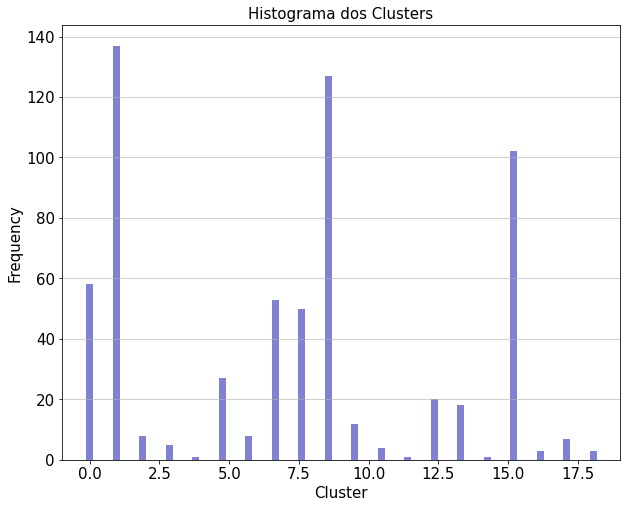

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 0.25, color='#0504aa',alpha=0.5)
plt.xlim(min(bin_edges)-1, max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Frequencia',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histograma dos Clusters',fontsize=15)
plt.show()

In [ ]:
cluster_sjc = kmeans.labels_[sjc]
print(cluster_sjc)

[14]


In [ ]:
posicoes_cidades_similares = np.where( kmeans.labels_ == cluster_sjc)
print(posicoes_cidades_similares)

(array([ 31,  51,  90,  91, 112, 200, 245, 250, 251, 328, 330, 341, 435,
       465, 521, 539, 548, 559]),)


In [ ]:
nomes_das_cidades_similares = ibge['Município com acento'][posicoes_cidades_similares[0]]
print(nomes_das_cidades_similares)

31                      ARAÇATUBA
51                          AVARÉ
90                         BROTAS
91                           BURI
112                      CANANÉIA
200                        GUAÍRA
245                      IPORANGA
250                       ITABERÁ
251                          ITAÍ
328                       MARÍLIA
330                  MARTINÓPOLIS
341       MIRANTE DO PARANAPANEMA
435                    PIRACICABA
465           PRESIDENTE EPITÁCIO
521       SANTA CRUZ DO RIO PARDO
539    SANTO ANTÔNIO DO ARACANGUÁ
548                    SÃO CARLOS
559           SÃO JOSÉ DOS CAMPOS
Name: Município com acento, dtype: object


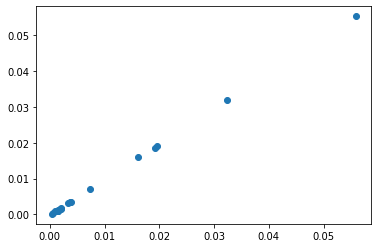

In [ ]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = scaled_data[kmeans.labels_ == cluster_sjc]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1]) # de acordo com "População 2010" e 	"Urbana"
plt.show()

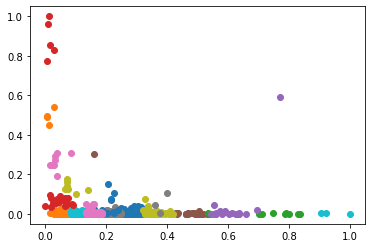

In [ ]:
u_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in u_labels:
  # plote de acordo com atributos "Área totalKm2" e "Densidade demográfica Hab./Km2"
  plt.scatter(scaled_data[kmeans.labels_ == i , 3],scaled_data[kmeans.labels_ == i,4], label=i) 
#plt.legend(loc='right')
plt.show()

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

#apenas 2 atributos == componentes principais do PCA
pca = PCA(2)

#Transform the data
data_pca = pca.fit_transform(scaled_data)
print(data_pca)

[[ 0.01331656 -0.01947806]
 [-0.08838002 -0.03033044]
 [ 0.04674677 -0.01693864]
 ...
 [-0.09885533  0.02914959]
 [ 0.02133294 -0.00182129]
 [-0.03440852 -0.03059084]]


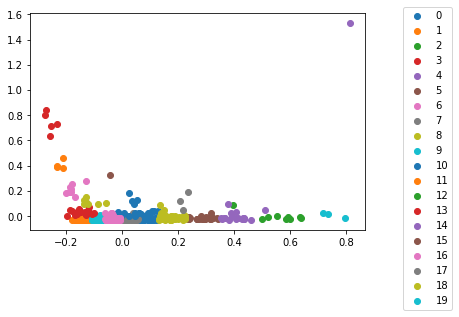

In [ ]:
u_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in u_labels:
  # plote de acordo com atributos "Área totalKm2" e "Densidade demográfica Hab./Km2"
  plt.scatter(data_pca[kmeans.labels_ == i , 0],data_pca[kmeans.labels_ == i,1], label=i) 
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
np.where(np.max(data_pca)==data_pca)
print(ibge.values[564])

['SÃO PAULO' 'RM de São Paulo' 11253503 11152344 101159 15233 738769 706]


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

#apenas 2 atributos == componentes principais do PCA
pca = PCA(2) 
data_scaled_sem_sp = np.delete(scaled_data, 564, 0)

#Transform the data
data_pca = pca.fit_transform(data_scaled_sem_sp )
print(data_pca)

[[ 0.0159807  -0.01497255]
 [-0.08474954 -0.03548507]
 [ 0.04897034 -0.01110374]
 ...
 [-0.10116423  0.01183467]
 [ 0.02188859 -0.00246873]
 [-0.03057519 -0.02850928]]


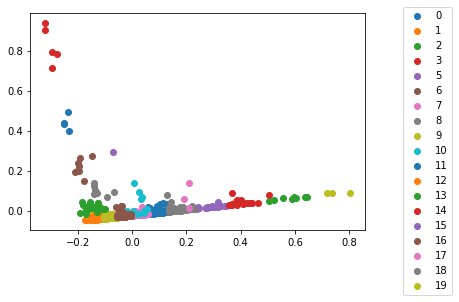

In [ ]:
kmeans.labels_sem_sp = np.delete(kmeans.labels_, 564, 0)
u_labels = np.unique(kmeans.labels_sem_sp)
 
#plotting the results:
 
for i in u_labels:
  # plote de acordo com atributos "Área totalKm2" e "Densidade demográfica Hab./Km2"
  plt.scatter(data_pca[kmeans.labels_sem_sp == i , 0],data_pca[kmeans.labels_sem_sp == i,1], label=i) 
#plt.legend(loc='right')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

No handles with labels found to put in legend.


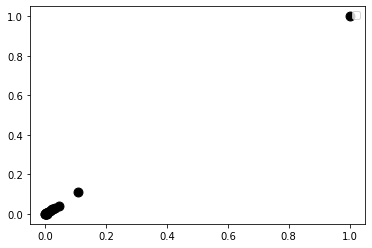

In [ ]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(relevancia)
 
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

**Definindo colunas que serão trabalhadas**

In [ ]:
data = ibge.iloc[:, 5:7].values 
data

array([[ 4114,  8216],
       [ 2111,  1685],
       [ 4747,  6772],
       ...,
       [ 1837, 59247],
       [ 4241, 19969],
       [ 3191,   732]])

**Normalizar dados ultilizando média/desvio**


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)
print(scaled_data)

[[0.20588235 0.00626669]
 [0.10431034 0.00104831]
 [0.23798174 0.00511291]
 ...
 [0.09041582 0.04704136]
 [0.21232252 0.01565755]
 [0.15907708 0.00028685]]


In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(scaled_data)

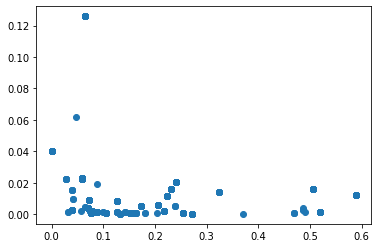

In [ ]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = scaled_data[kmeans.labels_]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1]) 
plt.show()

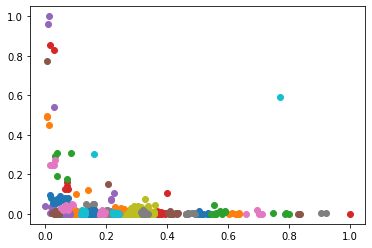

In [ ]:
u_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in u_labels:
  # plote de acordo com atributos "Área totalKm2" e "Densidade demográfica Hab./Km2"
  plt.scatter(scaled_data[kmeans.labels_ == i , 0],scaled_data[kmeans.labels_ == i,1], label=i) 
#plt.legend(loc='right')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(scaled_data)

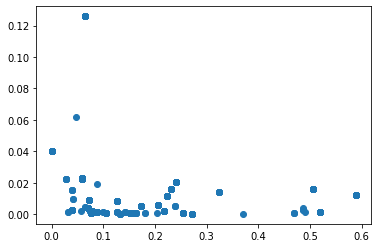

In [ ]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = scaled_data[kmeans.labels_]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1]) # de acordo com "População 2010" e 	"Urbana"
plt.show()

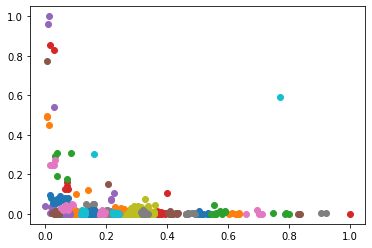

In [ ]:
u_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in u_labels:
  # plote de acordo com atributos "Área totalKm2" e "Densidade demográfica Hab./Km2"
  plt.scatter(scaled_data[kmeans.labels_ == i , 0],scaled_data[kmeans.labels_ == i,1], label=i) 
#plt.legend(loc='right')
plt.show()

In [ ]:
data = ibge.iloc[:, 2:8].values
data

array([[ 33797,  31948,   1849,   4114,   8216,      4],
       [  3557,   3200,    357,   2111,   1685,      1],
       [ 32148,  29001,   3147,   4747,   6772,      5],
       ...,
       [108809, 104659,   4150,   1837,  59247,     17],
       [ 84692,  82319,   2373,   4241,  19969,     19],
       [  2335,   1836,    499,   3191,    732,      1]])

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)
print(scaled_data)

[[2.93191908e-03 2.80862579e-03 1.82781562e-02 2.05882353e-01
  6.26669447e-03 4.25531915e-03]
 [2.44563570e-04 2.30726802e-04 3.52909776e-03 1.04310345e-01
  1.04831100e-03 0.00000000e+00]
 [2.78537645e-03 2.54436155e-03 3.11094416e-02 2.37981744e-01
  5.11291316e-03 5.67375887e-03]
 ...
 [9.59805373e-03 9.32878767e-03 4.10245257e-02 9.04158215e-02
  4.70413579e-02 2.26950355e-02]
 [7.45483439e-03 7.32550871e-03 2.34581204e-02 2.12322515e-01
  1.56575475e-02 2.55319149e-02]
 [1.35967392e-04 1.08413799e-04 4.93282852e-03 1.59077079e-01
  2.86847293e-04 0.00000000e+00]]


In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(scaled_data)

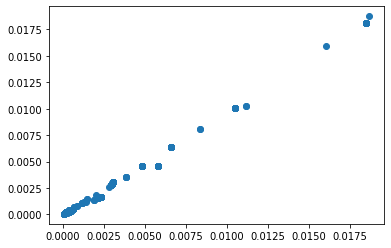

In [ ]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = scaled_data[kmeans.labels_]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1]) # de acordo com "População 2010" e 	"Urbana"
plt.show()

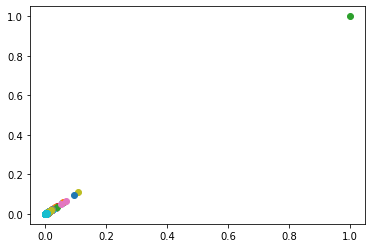

In [ ]:
u_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in u_labels:
  # plote de acordo com atributos "Área totalKm2" e "Densidade demográfica Hab./Km2"
  plt.scatter(scaled_data[kmeans.labels_ == i , 0],scaled_data[kmeans.labels_ == i,1], label=i) 
#plt.legend(loc='right')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(scaled_data)

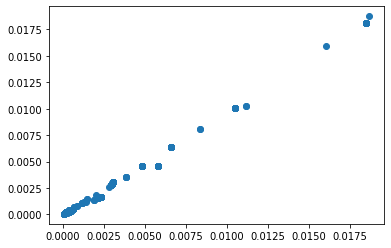

In [ ]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = scaled_data[kmeans.labels_]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1]) # de acordo com "População 2010" e 	"Urbana"
plt.show()

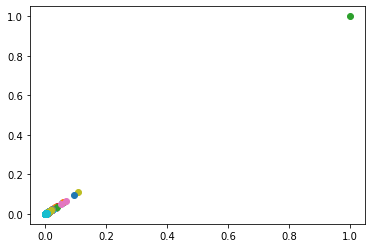

In [ ]:
u_labels = np.unique(kmeans.labels_)
 
#plotting the results:
 
for i in u_labels:
  # plote de acordo com atributos "Área totalKm2" e "Densidade demográfica Hab./Km2"
  plt.scatter(scaled_data[kmeans.labels_ == i , 0],scaled_data[kmeans.labels_ == i,1], label=i) 
#plt.legend(loc='right')
plt.show()

Os graficos dos agrupamentos com apenas 2 atributos, apresentam forma mais espaça devido os clusters apresentarem maior grau de semelhança, e podemos observar tambem um nivel de desordem maior neles

Ja os graficos dos agrupamentos com 6 atributos apresentam uma forma mais linear e com um menor grau de desordem pois como sao levados em conta uma maior contidade de atributo acaba melhorando a classificacao e clusterizacao dos mesmo 

Com isso concluimos que levando em conta menos atributos temos uma menor especificidade na classificacao dos clusters do que com uma quantidade maior de atributos, pois quanto maior a quantidade de atributos maior a especificidade do cluster e melhor sera o agrupamento